In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fft
from scipy import signal

In [2]:
def workToDo(n, R, t, y):
    kor = []
    for r in range(R):
        result = 0
        for i in range(1, n - r):
            result += y[i] * y[i-r]
        result = result * (1 / (n - r))
        kor.append(result)
    return kor

## SINUS

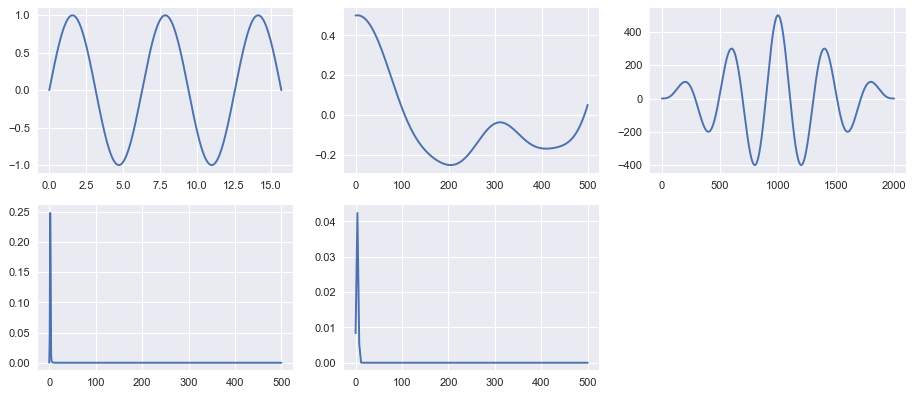

In [7]:
n = 1000
R = 500
t = np.linspace(0, 5*np.pi, n)
y = np.sin(t)

kor = workToDo(n, R, t, y)
korNp = np.correlate(y, y, "full")

f_periodogram, Pxx_den_periodogram = signal.periodogram(y, n)
f_welch, Pxx_den_welch = signal.welch(y, n)

with plt.style.context('seaborn'): 
    plt.figure(figsize=(14, 6), dpi=80)
    plt.subplot(231)
    plt.plot(t,y)
    plt.subplot(232)
    plt.plot(kor)
    plt.subplot(233)
    plt.plot(korNp)
    plt.subplot(234)
    plt.plot(f_periodogram, Pxx_den_periodogram)
    plt.subplot(235)
    plt.plot(f_welch, Pxx_den_welch)
    plt.show()

## PROSTOKĄT

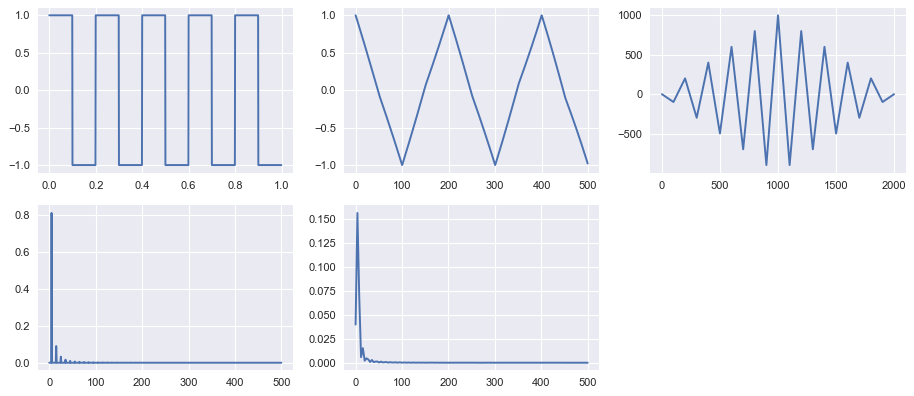

In [8]:
n = 1000
R = 500
t = np.linspace(0, 1, n, endpoint=False)
y = signal.square(2 * np.pi * 5 * t)

kor = workToDo(n, R, t, y)
korNp = np.correlate(y, y, "full")

f_periodogram, Pxx_den_periodogram = signal.periodogram(y, n)
f_welch, Pxx_den_welch = signal.welch(y, n)

with plt.style.context('seaborn'): 
    plt.figure(figsize=(14, 6), dpi=80)
    plt.subplot(231)
    plt.plot(t,y)
    plt.subplot(232)
    plt.plot(kor)
    plt.subplot(233)
    plt.plot(korNp)
    plt.subplot(234)
    plt.plot(f_periodogram, Pxx_den_periodogram)
    plt.subplot(235)
    plt.plot(f_welch, Pxx_den_welch)
    plt.show()

## TRÓJKĄT / ZĘBY

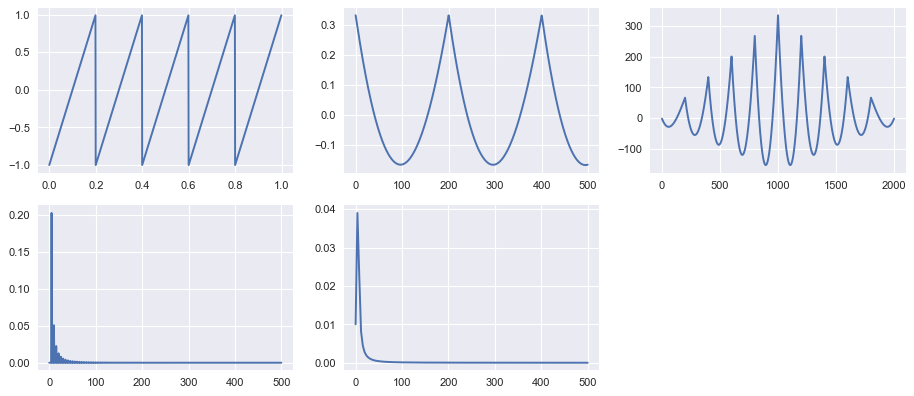

In [9]:
n = 1000
R = 500
t = np.linspace(0, 1, n, endpoint=False)
y = signal.sawtooth(2 * np.pi * 5 * t)

kor = workToDo(n, R, t, y)
korNp = np.correlate(y, y, "full")

f_periodogram, Pxx_den_periodogram = signal.periodogram(y, n)
f_welch, Pxx_den_welch = signal.welch(y, n)

with plt.style.context('seaborn'): 
    plt.figure(figsize=(14, 6), dpi=80)
    plt.subplot(231)
    plt.plot(t,y)
    plt.subplot(232)
    plt.plot(kor)
    plt.subplot(233)
    plt.plot(korNp)
    plt.subplot(234)
    plt.plot(f_periodogram, Pxx_den_periodogram)
    plt.subplot(235)
    plt.plot(f_welch, Pxx_den_welch)
    plt.show()

## LOSOWY

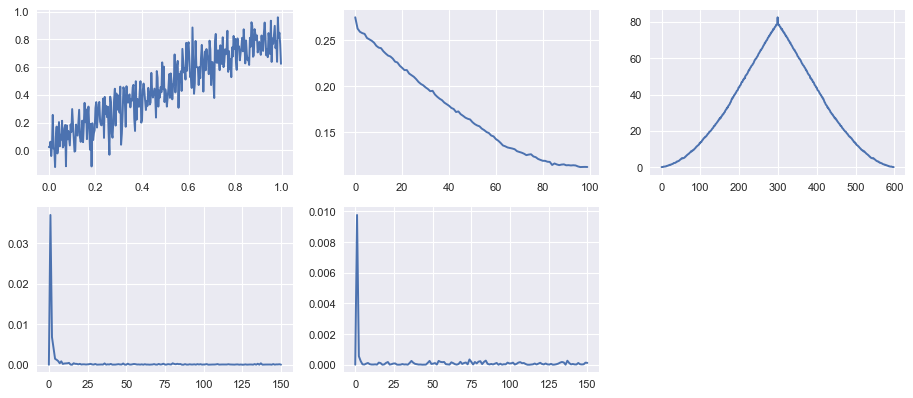

In [10]:
n = 300
R = 100
t = np.linspace(0, 1, n, endpoint=False)
y = np.sin(t) + np.random.normal(scale=0.1, size=len(t))

kor = workToDo(n, R, t, y)
korNp = np.correlate(y, y, "full")

f_periodogram, Pxx_den_periodogram = signal.periodogram(y, n)
f_welch, Pxx_den_welch = signal.welch(y, n)

with plt.style.context('seaborn'): 
    plt.figure(figsize=(14, 6), dpi=80)
    plt.subplot(231)
    plt.plot(t,y)
    plt.subplot(232)
    plt.plot(kor)
    plt.subplot(233)
    plt.plot(korNp)
    plt.subplot(234)
    plt.plot(f_periodogram, Pxx_den_periodogram)
    plt.subplot(235)
    plt.plot(f_welch, Pxx_den_welch)
    plt.show()

zadanie domowe: widmo sygnału, mamy sygnal zmieniajacy sie w czasie to widmo to sposób reprezetnacji sygnału w dzedzinie czestotliwości, mówi jaka jest zawartość poszczególnych składowych w sygnale, 
wyznaczanie widma to metody, np. bazuje na tym, że widmo jest transformacją furiera funkcji autokorelacji dla sgynalu
ale inna lepsza to np. periodogram oraz metoda welcha - sa zaimplementowane w pythonie
przygotuj kod ktory dla funkcjisinus, trojkat, prostokatne, losowe, dla kazdego z nich wyznaczamy periodogramy i welchy
trudnosc to odnalezienie ich w bibliotece i wywolanie w opowiedni sposob